## Analysis and Critique of “[Declining birth rate in Developed Countries: A radical policy re-think is required by G. Nargund](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/)”

<b>Fertility rate</b> is defined as the total number of children women would hypothetically birth assuming survival which is what we are exploring.

<b>Birth rate</b> is defined as the total number of actual births within a specific time period.
Replacement fertility rate is defined as the minimum fertility rate necessary to maintain a nation’s population.

Global fertility rates have been steadily decreasing since the late 1960s, which can result in in a country with a dis proportionately large elderly population which can be difficult to sustain economically.


Our project aims at analysing this article, since it has made various statements without citing any data sources and analysis. We will also expand upon various factors that contribute towards declining fertility rates among various sections of countries around the world.




In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import requests
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

#### World Bank Data Importing and Preprocessing

In [2]:
fr = pd.read_csv('Fertility_Rate.csv')
fr.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.2710,4.059000,3.842000,...,1.779000,1.795000,1.813000,1.83400,1.854000,1.872000,1.886000,1.896000,1.901000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.723308,6.738651,6.752818,6.7654,6.775406,6.783357,...,4.956842,4.882058,4.804516,4.72622,4.647637,4.569675,4.493744,4.420264,4.349433,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450000,7.450000,7.450000,7.4500,7.450000,7.450000,...,5.770000,5.562000,5.359000,5.16300,4.976000,4.800000,4.633000,4.473000,4.321000,NaN


Since all of the world bank datasets are in this format, create a function to set an index, drop unwanted columns and also transpose the dataframe for ease of accessing countries.

In [3]:
#Function to initialize World bank datasets
def initialize_df(path,index,cols):
    df = pd.read_csv(path)
    df = df.rename(columns ={'Country Name': 'Years'})
    df = df.drop(columns = cols)
    df = df.set_index(index)
    df = df.transpose()
#     df = df.rename(index={'Country Name': 'Years'})

    return df

Due to which all the datasets will be in the following format

In [4]:
#Fertility Rate data
fr_flip = initialize_df('Fertility_Rate.csv','Years',['Country Code','Indicator Name','Indicator Code'])
fr_flip

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,4.820,6.723308,7.450,6.439002,6.708,6.489,NaN,6.977256,6.929,3.109,...,5.615,6.348,7.197,4.979299,7.651,NaN,7.938,6.041,7.115,7.158
1961,4.655,6.738651,7.450,6.455523,6.790,6.401,NaN,6.998635,6.910,3.100,...,5.651,6.392,7.120,5.003564,7.645,NaN,7.962,6.028,7.169,7.215
1962,4.471,6.752818,7.450,6.471399,6.872,6.282,NaN,7.018725,6.892,3.090,...,5.679,6.425,7.033,5.025367,7.630,NaN,7.991,6.010,7.214,7.267
1963,4.271,6.765400,7.450,6.487246,6.954,6.133,NaN,7.035036,6.875,3.079,...,5.696,6.448,6.938,5.045551,7.604,NaN,8.026,5.986,7.249,7.311
1964,4.059,6.775406,7.450,6.502619,7.036,5.960,NaN,7.045690,6.857,3.068,...,5.698,6.464,6.836,5.056470,7.567,NaN,8.067,5.956,7.274,7.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1.872,4.569675,4.800,5.251674,5.686,1.659,NaN,3.322437,1.491,2.288,...,2.090,2.030,3.859,2.445609,3.976,2.06,3.994,2.457,4.814,3.804
2017,1.886,4.493744,4.633,5.182391,5.600,1.638,NaN,3.276487,1.448,2.275,...,2.080,2.042,3.820,2.428188,3.926,2.02,3.890,2.430,4.718,3.707
2018,1.896,4.420264,4.473,5.113003,5.519,1.617,NaN,3.231001,1.413,2.261,...,2.060,2.049,3.782,2.415986,3.877,2.00,3.792,2.405,4.633,3.615
2019,1.901,4.349433,4.321,5.044144,5.442,1.597,NaN,3.187157,1.387,2.247,...,2.050,2.050,3.744,2.402707,3.830,1.97,3.700,2.381,4.559,3.531


In [5]:
mm_flip = initialize_df('Maternal Mortality.csv','Years',['Country Code','Indicator Name','Indicator Code'])#Maternal Mortality data (per 100000 live births)
im_flip = initialize_df('Infant Mortality.csv','Years',['Country Code','Indicator Name','Indicator Code'])#Infant Mortality data (per 100000 live births)
br_flip = initialize_df('Birth Rate.csv','Years',['Country Code','Indicator Name','Indicator Code'])
gdp_flip = initialize_df('gdp.csv','Years',['Country Code','Indicator Name','Indicator Code'])
inc_flip = initialize_df('Income_per_Capita.csv','Years',['Country Code','Indicator Name','Indicator Code'])
inf_flip = initialize_df('Inflation.csv','Years',['Country Code','Indicator Name','Indicator Code'])

In [6]:
mm_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
im_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.7,NaN,...,NaN,NaN,105.5,NaN,77.0,NaN,NaN,NaN,121.7,92.8
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.4,NaN,...,NaN,NaN,103.3,NaN,74.4,NaN,NaN,NaN,119.8,90.5
1962,NaN,NaN,232.0,NaN,NaN,NaN,NaN,NaN,122.1,NaN,...,NaN,NaN,100.6,NaN,72.0,NaN,279.7,NaN,117.9,88.2
1963,NaN,NaN,227.8,NaN,NaN,NaN,NaN,NaN,115.8,NaN,...,NaN,NaN,98.0,NaN,69.7,NaN,274.2,NaN,116.2,85.8
1964,NaN,NaN,223.9,177.122131,NaN,NaN,NaN,NaN,109.4,NaN,...,NaN,56.8,95.0,NaN,67.6,NaN,268.3,NaN,114.8,83.2


In [8]:
br_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,35.679,47.340743,51.279,47.119165,49.080,40.924,NaN,47.790077,47.266,23.775,...,35.00,42.165,48.771,31.749262,48.138,NaN,53.504,41.075,49.672,47.996
1961,34.529,47.279733,51.373,47.121719,48.779,40.368,NaN,47.558391,46.705,23.569,...,34.62,41.661,48.277,31.035485,47.774,NaN,53.786,40.882,49.806,47.988
1962,33.320,47.231580,51.457,47.108858,48.547,39.627,NaN,47.327603,46.093,23.372,...,34.24,41.050,47.703,34.888245,47.323,NaN,54.089,40.663,49.872,47.950
1963,32.050,47.190352,51.530,47.082430,48.430,38.723,NaN,47.091615,45.426,23.191,...,33.86,40.373,47.048,36.061347,46.761,NaN,54.413,40.419,49.865,47.876
1964,30.737,47.128506,51.589,47.046124,48.450,37.695,NaN,46.844209,44.694,23.033,...,33.48,39.670,46.326,34.952349,46.084,NaN,54.750,40.152,49.793,47.770


In [9]:
gdp_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,1.934248e+10,5.377778e+08,1.040732e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.383415e+12,NaN,NaN,NaN,7.575397e+09,7.130000e+08,1.052990e+09
1961,NaN,1.975349e+10,5.488889e+08,1.113130e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.439081e+12,NaN,NaN,NaN,7.972997e+09,6.962857e+08,1.096647e+09
1962,NaN,2.152662e+10,5.466667e+08,1.194684e+10,NaN,NaN,NaN,NaN,NaN,2.445060e+10,...,NaN,NaN,NaN,1.544343e+12,NaN,NaN,NaN,8.497997e+09,6.931429e+08,1.117602e+09
1963,NaN,2.577236e+10,7.511112e+08,1.268022e+10,NaN,NaN,NaN,NaN,NaN,1.827212e+10,...,NaN,NaN,NaN,1.663683e+12,NaN,NaN,NaN,9.423396e+09,7.187143e+08,1.159512e+09
1964,NaN,2.356323e+10,8.000000e+08,1.384262e+10,NaN,NaN,NaN,NaN,NaN,2.560525e+10,...,NaN,NaN,NaN,1.822520e+12,NaN,NaN,NaN,1.037400e+10,8.394286e+08,1.217138e+09


In [10]:
inc_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
inf_flip.head()

Years,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.288878,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.102343,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.654867,NaN,NaN,1.246290,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689655,NaN,NaN,1.337968,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.308219,NaN,NaN,2.534980,NaN,NaN


### Hypothesis 1: There is a strong relationship with a correlation coefficient greater than 0.6 between fertility rate and three economic factors: GDP, Income per Capita, and Inflation.

One of the article's main points is that fertility rates are significantly lower for industrialized/developed countries to the point that their fertility rates are dropping lower than the replacement fertility rate needed to maintain a population's size. However, there is no clarification made as to which countries are developed and which are not. 

For example:
"Developed countries tend to have a lower fertility rate due to lifestyle choices associated with economic affluence where mortality rates are low."

In this section, we'll be examining the relationship between a country's overall economic status and the fertility rate of its population. But first, we'll need to determine a classification of countries to compare fertility rates across different economic levels.

In the article, the author divides the world's nations into two classes, developed and developing, but we believe this is not an adequate organization of global economies. 

In the graph below, it is clear that fertility rates differ widely among countries, but classifying each of them to two categories would not properly distinguish the countries into meaningful groups. Instead, we'll be using a different system of categorizing countries that can give us a better picture of how fertility rates correlate with economic status by utilizing four economic groupings.


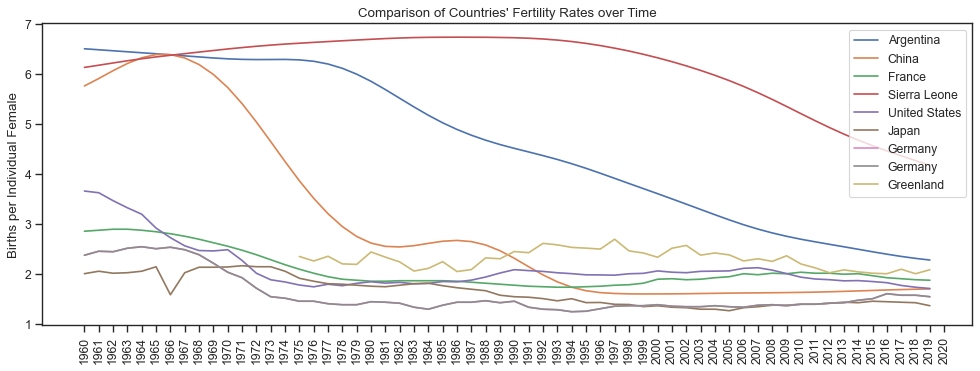

In [12]:
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['Belize'], label='Argentina')
plt.plot(fr_flip['China'], label='China')
plt.plot(fr_flip['France'], label='France')
plt.plot(fr_flip['Sierra Leone'], label='Sierra Leone')
plt.plot(fr_flip['United States'], label='United States')
plt.plot(fr_flip['Japan'], label='Japan')
plt.plot(fr_flip['Germany'], label='Germany')
plt.plot(fr_flip['Germany'], label='Germany')
plt.plot(fr_flip['Greenland'], label='Greenland')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Countries' Fertility Rates over Time")
plt.xticks(rotation = 90)
plt.show()

#### Assigning Country Classifications
We'll be using the World Bank's classification of country economies based off their gross national income(GNI) per capita which categorizes countries into four major economic groups: lower, lower-middle, upper-middle, and high.
The categories can be found here: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups.
The groups were made using the following definitions:

Lower - GNI per capita at \\$1045 or less

Lower-middle - GNI per capita between \\$1046 and \\$4095

Upper-middle - GNI per capita between \\$4096 and \\$12695

High - GNI per capita of \\$12696 or more

Ten countries were semi-randomly selected from each category with a prerequisite of having a population over one million.

We shall create a function for such classifications so that it can be used among multiple world bank datasets.

In [13]:
#creates new columns containing income_level based values
def income_assign(df):
    """Creates additional columns that show the mean fertility rate for the four country classes: lower, lower-middle,
    upper-middle, high. Also creates an additional 'world' column to represent all classes collectively.
    
    param: df: The flipped fertility rate dataframe
    return: The original dataframe with additional columns that show the mean fertility rate for the four country classes
    """
    lower_income = ['Afghanistan','Liberia','Chad','Madagascar','Mali','Uganda','Sudan','Niger','Sierra Leone','Burundi']
    lower_middle = ['Bangladesh','Cameroon','Ukraine','Zimbabwe','Haiti','Philippines','Tanzania','Nicaragua','Kenya','Honduras']
    upper_middle = ['Dominican Republic','Ecuador','Fiji','Thailand','Turkey','Paraguay','Namibia','Cuba','South Africa','Belarus']
    high_income = ['Japan','Spain','Kuwait','Sweden','Chile','Latvia','Uruguay','Canada','United States','Singapore']
    combined = lower_income + lower_middle + upper_middle + high_income
    df = df.assign(LOWER = df[lower_income].mean(1))
    df = df.assign(LOWER_MIDDLE=df[lower_middle].mean(1))
    df = df.assign(UPPER_MIDDLE=df[upper_middle].mean(1))
    df = df.assign(HIGH=df[high_income].mean(1))
    df = df.assign(WORLD = df[combined].mean(1))
    return df

In [14]:
fr_flip = income_assign(fr_flip)

#### Analyzing Replacement Rates:

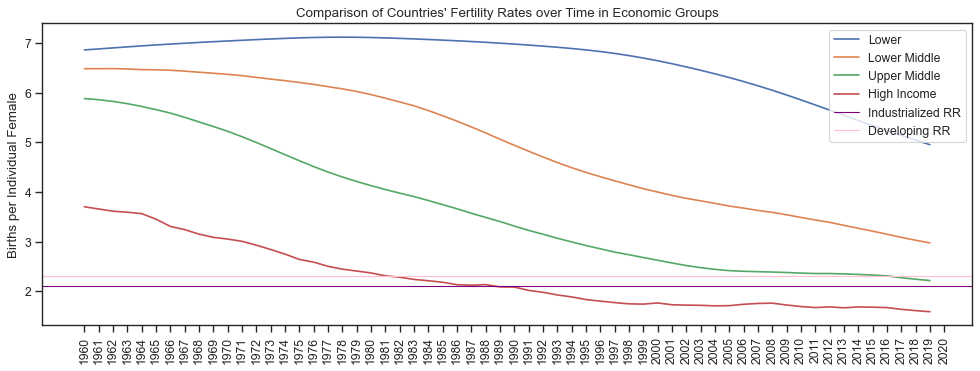

In [15]:
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['LOWER'], label='Lower')
plt.plot(fr_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(fr_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(fr_flip['HIGH'], label='High Income')
plt.axhline(y=2.1, linewidth='1',color='purple', label='Industrialized RR')
plt.axhline(y=2.3, linewidth='1',color='pink', label='Developing RR')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Countries' Fertility Rates over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

Here we visualized the change in fertility rate from 1960 to 2020 in the four groups. The purple horizontal line represents the replacement rate for "industrialized" countries at 2.3 while the pink horizontal lines represents the replacement rate for "developing" countries. As shown by the graph, high income countries are dropping significantly below the replacement rate for industrialized countries, but countries in the other three categories remain above the replacement rate with the Upper-middle value coming somewhat close. 

### Economic factors that may influence fertility rates:

###  1. Relationship between GDP and Fertility Rate

In [16]:
gdp_flip = income_assign(gdp_flip)

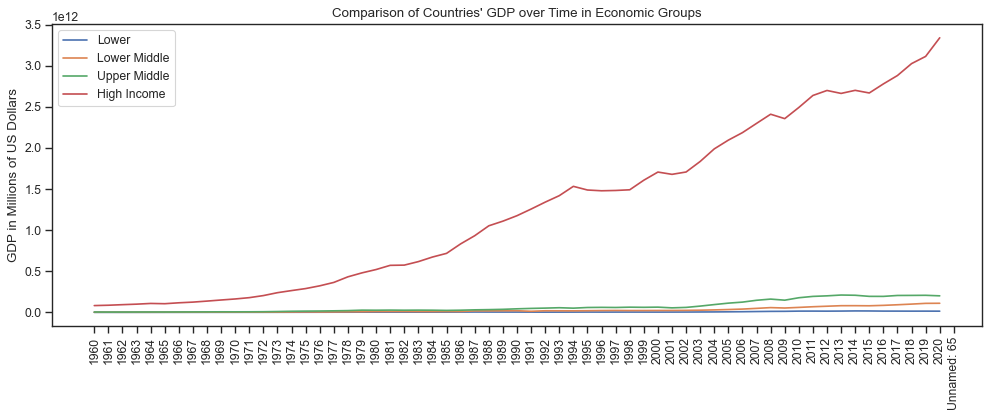

In [17]:
figure(figsize=(15, 5), dpi=80)
plt.plot(gdp_flip['LOWER'], label='Lower')
plt.plot(gdp_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(gdp_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(gdp_flip['HIGH'], label='High Income')
plt.legend()
plt.ylabel('GDP in Millions of US Dollars')
plt.title("Comparison of Countries' GDP over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

As shown by the graph, the gross domestic product is increasing for all country groups, but the GDP of high income countries are increasing at a much greater rate. Next, we'll compare the GDP of these groups with their respective fertility rates to see if we can find patterns between these two factors.

Hypothesis: The relationship between GDP and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [18]:
@interact
def GDP_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    """Creates an interactive graph for the four economic country classes which compares fertility rate and GDP
    over time. Also calculates the correlation coefficient between the two sets of data. Uses jupyter notebook's 
    ipywidgets library for the interactive feature.
    
    :param ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']: pre-input into the function through @interact
    :return: Two graphs that show fertility rate over time and GDP over time respectively and the correlation coefficient
    between the two sets of data.
    """
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and GDP Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(gdp_flip[category], label='GDP', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate im Births per Individual Female")
    ax2.set_title("GDP")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("GDP in Millions of US Dollars")
    plt.tight_layout()
    
    gdp_corr = fr_flip[category].corr(gdp_flip[category])
    print('Correlation between Fertility Rate and GDP in {} Income Countries: '.format(category), gdp_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

#### Results
Correlation coefficients between fertility rates and GDP for all four economic country groups are shown below:  
Lower:        -0.946  
Lower-Middle: -0.865  
Upper-Middle: -0.794  
High:         -0.859  


#### Conclusion
We are not able to reject our null hypothesis and conclude that there is a strong relationship between GDP and fertility rates in countries from all economic classes.

### 2. Relationship between Income per Capita and Fertility Rate

In [19]:
inc_flip = income_assign(inc_flip)

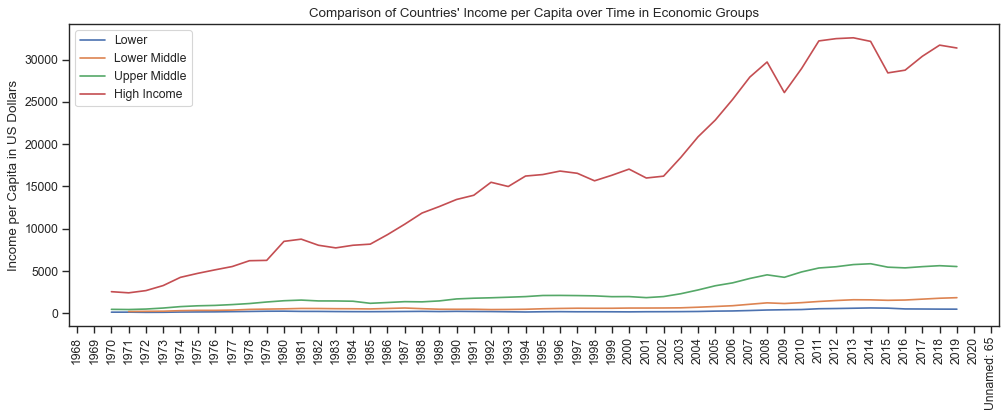

In [20]:
figure(figsize=(15, 5), dpi=80)
plt.plot(inc_flip['LOWER'], label='Lower')
plt.plot(inc_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(inc_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(inc_flip['HIGH'], label='High Income')
plt.ylabel('Income per Capita in US Dollars')
plt.legend()
plt.title("Comparison of Countries' Income per Capita over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.show()

As expected, the rate of growth in income per capita closely resembles the pattern scene in GDP growth. All economic groups show an increase over time, but countries in the high income category show markedly higher growth rates in income per capita than other groups.

Hypothesis: The relationship between income per capita and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [21]:
@interact
def inc_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    """Creates an interactive graph for the four economic country classes which compares fertility rate and 
    income per capita over time. Also calculates the correlation coefficient between the two sets of data. 
    Uses jupyter notebook's ipywidgets library for the interactive feature.
    
    :param ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']: pre-input into the function through @interact
    :return: Two graphs that show fertility rate over time and income per capita over time respectively and the 
    correlation coefficient between the two sets of data.
    """
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and Income per Capita Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(inc_flip[category], label='Income per Capita', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate")
    ax2.set_title("Income per Capita")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("Income")
    plt.tight_layout()
    inc_corr = fr_flip[category].corr(inc_flip[category])
    print('Correlation between Fertility Rate and Income per Capita in {} Income Countries: '.format(category), inc_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

#### Results
Correlation coefficients between fertility rates and Income per Capita for all four economic country groups are shown below:  
Lower:        -0.903  
Lower-Middle: -0.820  
Upper-Middle: -0.803  
High:         -0.864  


#### Conclusion
We are not able to reject our null hypothesis and conclude that there is a strong relationship between GDP and Income per Capita in countries from all economic classes.

### 3. Relationship between Inflation Rate and Fertility Rate


In [22]:
inf_flip = income_assign(inf_flip)

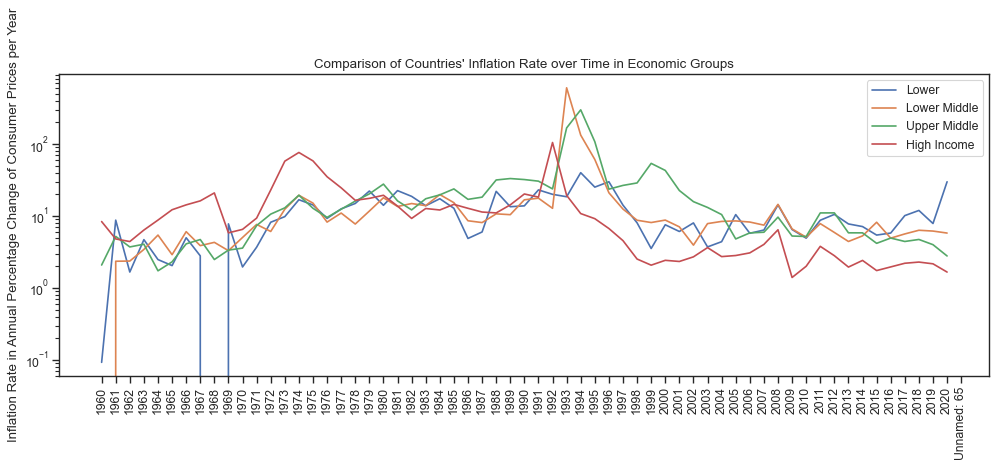

In [23]:
figure(figsize=(15, 5), dpi=80)
plt.plot(inf_flip['LOWER'], label='Lower')
plt.plot(inf_flip['LOWER_MIDDLE'], label='Lower Middle')
plt.plot(inf_flip['UPPER_MIDDLE'], label='Upper Middle')
plt.plot(inf_flip['HIGH'], label='High Income')
plt.ylabel('Inflation Rate in Annual Percentage Change of Consumer Prices per Year')
plt.legend()
plt.title("Comparison of Countries' Inflation Rate over Time in Economic Groups")
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

Unlike the previous two factors, inflation rates do not show any discernible pattern across all economic groups. The graph was made using a logarithmic scale due to a dramatic increase in inflation rate in the early nineties in Lower and Upper Middle Countries.

Hypothesis: The relationship between inflation rate and fertility rate will have a strong correlation with an average coefficient greater than the absolute value of 6.0 across all economic groups.

In [24]:
@interact
def inf_graph(category = ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']):
    """Creates an interactive graph for the four economic country classes which compares fertility rate and inflation rate
    over time. Also calculates the correlation coefficient between the two sets of data. Uses jupyter notebook's ipywidgets 
    library for the interactive feature.
    
    :param ['LOWER','LOWER_MIDDLE','UPPER_MIDDLE','HIGH']: pre-input into the function through @interact
    :return: Two graphs that show fertility rate over time and inflation rate over time respectively and the correlation 
    coefficient between the two sets of data.
    """
    fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
    fig.suptitle('Fertility Rate and Inflation Rate Trends for {} Income Countries'.format(category))
    ax1.plot(fr_flip[category], label='Fertility Rate')
    ax2.plot(inf_flip[category], label='Inflation Rate', color='red')
    ax1.set_title("Fertility Rate")
    ax1.set_xlabel("Year")
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel("Fertility Rate")
    ax2.set_title("Inflation Rate in Annual Percentage Change of Consumer Prices per Year")
    ax2.set_xlabel("Year")
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.set_ylabel("Income")
    plt.tight_layout()
    inf_corr = fr_flip[category].corr(inf_flip[category])
    print('Correlation between Fertility Rate and Inflation Rate in {} Income Countries: '.format(category), inf_corr.round(3))

interactive(children=(Dropdown(description='category', options=('LOWER', 'LOWER_MIDDLE', 'UPPER_MIDDLE', 'HIGH…

#### Results
Correlation coefficients between fertility rates and inflation rate for all four economic country groups are shown below:  
Lower:        0.217  
Lower-Middle: -0.049  
Upper-Middle: -0.17  
High:         0.213  


#### Conclusion
We are rejecting our null hypothesis and conclude that there is not a strong relationship between inflation rate and fertility rates in countries from all economic classes.


### Summary of Economic Factor Analysis
In this first analysis, we were able to determine a strong relationship between specific economic factors and global fertility rates. The gross domestic product as well as the income per capita of a nation has a strong correlation with the rate at which fertility rates are changing within that nation. However, we also determined that inflation rates do not correlate with fertility rates and do not appear to have a relationship.  Therefore, we generally agree with the statement made by the author that fertility rates are lower in "industrialized" or "developed" nations due to two points of evidence:  
1. Countries with higher economic rankings appear to have overall lower fertility rates than countries with lower economic rankings.
2. Fertility rates within a country appear to decrease as GDP and income per capita of a nation increase.

### Hypothesis 2:  Fertility rate in countries having low GNI (Gross National Income per capita) will be higher compared to other countries. At the same time, due to higher maternal and perinatal mortality, there is a reduction in birth rates for such countries.

Statement from the article: **'Fertility Rate in poorly resourced countries tend to be higher, However, due to maternal and perinatal mortality, There is a reduction in Birth Rates'**


While this statement does not provide any statistical data, nor does it quanitfy 'poorly resourced countries', We aim to analyse this statement based on available data (Since no data source is mentioned in the article) and check the overall trend of Maternal and Fetal Mortality with Birth Rate, and Fertility Rate for Poorly Resourced Countries.


 ####  'Fertility Rate in poorly resourced countries tend to be higher'

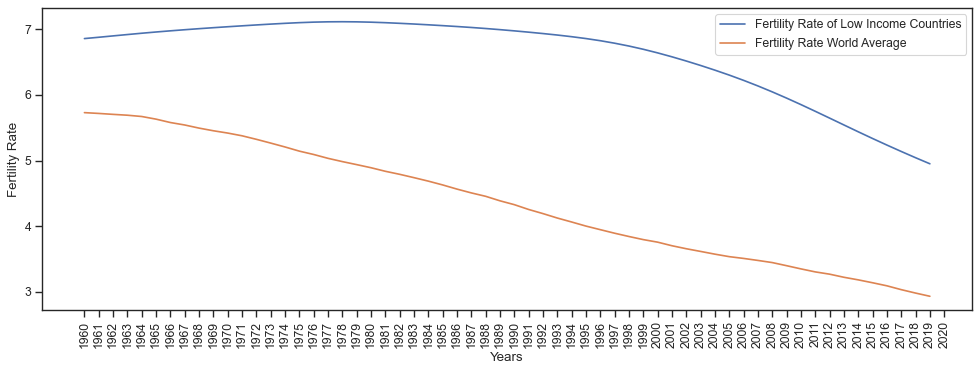

In [25]:
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['LOWER'],label = 'Fertility Rate of Low Income Countries')
plt.plot(fr_flip['WORLD'],label = 'Fertility Rate World Average')
plt.xlabel('Years')
plt.ylabel('Fertility Rate')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

As stated in the article, Fertility rate of Low Income Countries is considerably higher compared to the World average, and is also decreasing at a lower rate compared to the rest of the world. There maybe various factors for this.

**However, due to maternal and perinatal mortality, There is a reduction in Birth Rates'**

We first explore the overall trends of Maternal and Natal mortality rates

In [26]:
im_flip = income_assign(im_flip) #Infant Mortality

In [27]:
mm_flip = income_assign(mm_flip)

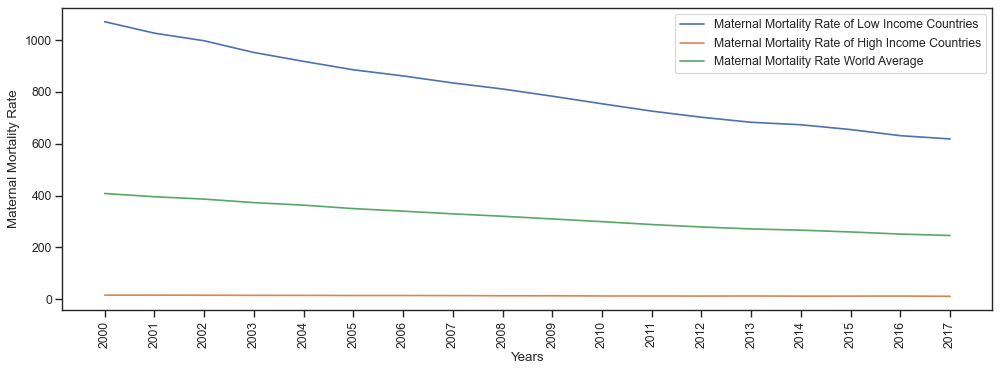

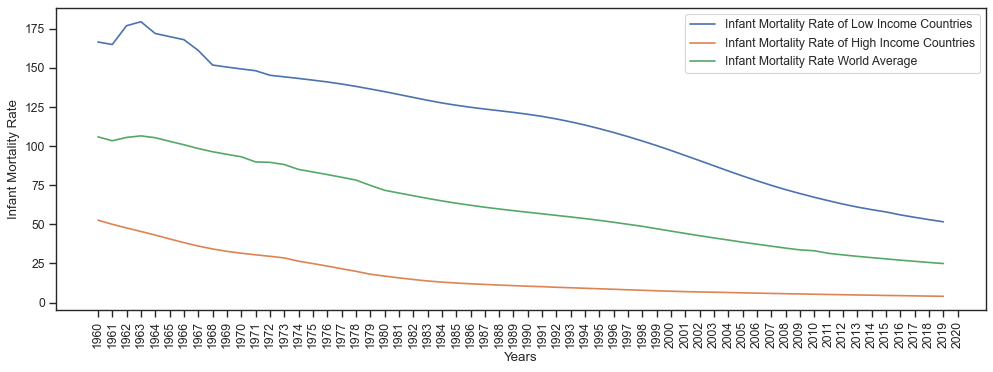

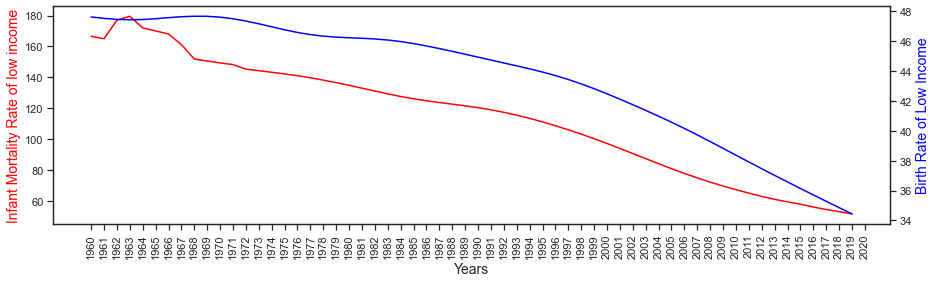

In [28]:
figure(figsize=(15, 5), dpi=80)
plt.plot(mm_flip['LOWER'],label = 'Maternal Mortality Rate of Low Income Countries')
plt.plot(mm_flip['HIGH'],label = 'Maternal Mortality Rate of High Income Countries')
plt.plot(mm_flip['WORLD'],label = 'Maternal Mortality Rate World Average')
plt.xlabel('Years')
plt.ylabel('Maternal Mortality Rate')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

figure(figsize=(15, 5), dpi=80)
plt.plot(im_flip['LOWER'],label = 'Infant Mortality Rate of Low Income Countries')
plt.plot(im_flip['HIGH'],label = 'Infant Mortality Rate of High Income Countries')
plt.plot(im_flip['WORLD'],label = 'Infant Mortality Rate World Average')
plt.xlabel('Years')
plt.ylabel('Infant Mortality Rate')
plt.xticks(rotation = 90)
plt.legend()
plt.show()



# figure(figsize=(15, 4), dpi=80)
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 4))
# make a plot
ax.plot(im_flip['LOWER'],label = 'Infant Mortality Rate of Low Income Countries', color = 'red')
# set x-axis label
ax.set_xlabel("Years",fontsize=14)
# set y-axis label
ax.set_ylabel("Infant Mortality Rate of low income",color="red",fontsize=14)
plt.xticks(rotation = 90)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(br_flip['Low income'],label = 'Birth Rate of Low Income Countries',color = 'blue')
ax2.set_ylabel("Birth Rate of Low Income",color="blue",fontsize=14)
plt.show()

#reference: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/


In [29]:
br_flip = income_assign(br_flip)

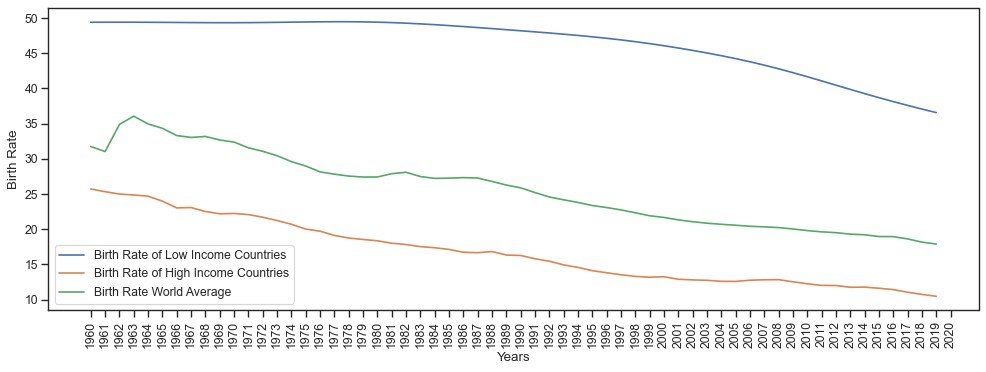

In [30]:
figure(figsize=(15, 5), dpi=80)
plt.plot(br_flip['LOWER'],label = 'Birth Rate of Low Income Countries')
plt.plot(br_flip['HIGH'],label = 'Birth Rate of High Income Countries')
plt.plot(br_flip['World'],label = 'Birth Rate World Average')
plt.xlabel('Years')
plt.ylabel('Birth Rate')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


As seen above, The Maternal and Infant Mortality rates for Low income countries is higher than the world average and also higher than High Income Countries, but the birthrate is also higher. 

The article states that due to High Infant and Mortality Rates, there is a reduction in birthrates. However, we also observe that for HIGH income countries, Maternal and Infant Mortality is comparitively lower but yet there is an overall reduction in birthrates. Thus, Maternal and Natal Mortality rates cannot be directly correlated as a whole factor causing the overall reduction in birthrates for such poorly resourced countries, but they are a contributing factor. 


### Hypothesis 3: The percentage share of housing, food, transportation, clothing, healthcare, child care and education and other miscellaneous expenses for a child will increase with time, being a contributing factor affecting the native fertility of US.

Statement from the article ***"In addition there are socio-economic factors that have led to women and couples delaying having children. Lack of affordable housing, flexible and part-time career posts for women and affordable and publicly funded (free) child care have contributed to the current low fertility/birth rates."***
 
Along the lines of this statement, we aim at analyzing the overall expenditure on Children.


In terms of "Expenditure on Children", There are various components as follows:

Source - https://www.fns.usda.gov/resource/expenditures-children-families-reports-all-years

1. Housing expenses: includes shelter (mortgage interest, property taxes, or rent; maintenance and repairs; and insurance), utilities (gas, electricity, fuel, telephone, and water), and house furnishings and equipment (furniture, floor coverings, major appliances, and small appliances). It should be noted that for homeowners, housing expenses do not include mortgage principal payments; such payments are considered in the CE to be a part of savings. So total dollars allocated to housing by homeowners are underestimated in this report.

2. Food expenses: includes food and nonalcoholic beverages purchased at grocery, convenience, and specialty stores, including purchases with food stamps; dining at restaurants; and household expenditures on school meals.

3. Transportation expenses: includes the net outlay on purchase of new and used vehicles, vehicle finance charges, gasoline and motor oil, maintenance and repairs, insurance, and public transportation.

4. Clothing expenses: includes children’s apparel such as diapers, shirts, pants, dresses, and suits; footwear; and clothing services such as dry cleaning, alterations and repair, and storage.

5. Health care expenses: includes medical and dental services not covered by insurance, prescription drugs and medical supplies not covered by insurance, and health insurance premiums not paid by employer or other organization.

6. Child care and education expenses: includes day care tuition and supplies; baby-sitting; and elementary and high school tuition, books, and supplies.

7. Miscellaneous expenses: includes personal care items, entertainment, and reading materials



In [31]:
# Importing the data from "Annual Report on Expenditures on Children by Families" by "UNITED STATES DEPARTMENT OF AGRICULTURE"
# for the time period 1995 to 2015 
# Note: We did not get the annual report for the year 2014
child_expenses = pd.read_csv("US_child_expenditure_data.csv")

# print(child_expenses.dtypes)
# cleaning the file
column_list = ['Total', 'Housing', 'Food', 'Transportation','Clothing', 'Healthcare', 'Child care and Education', 'Miscellaneous']
for col_ele in column_list:
    child_expenses[col_ele] = child_expenses[col_ele].str.replace(",","")
    child_expenses[col_ele] = child_expenses[col_ele].str.replace("$","")
    child_expenses[col_ele] = child_expenses[col_ele].astype(float)

        
child_expenses.head()
                                                                                          

,Age of child,Total,Housing,Food,Transportation,Clothing,Healthcare,Child care and Education,Miscellaneous,Income Category,Year
0,0 to 2,5490.0,2100.0,780.0,700.0,370.0,370.0,630.0,540.0,Low Income,1995
1,3 to 5,5610.0,2080.0,870.0,680.0,360.0,360.0,710.0,550.0,Low Income,1995
2,6 to 8,5740.0,2010.0,1120.0,790.0,410.0,410.0,420.0,580.0,Low Income,1995
3,9 to 11,5770.0,1810.0,1340.0,860.0,450.0,450.0,250.0,610.0,Low Income,1995
4,12 to 14,6560.0,2020.0,1410.0,970.0,760.0,450.0,180.0,770.0,Low Income,1995


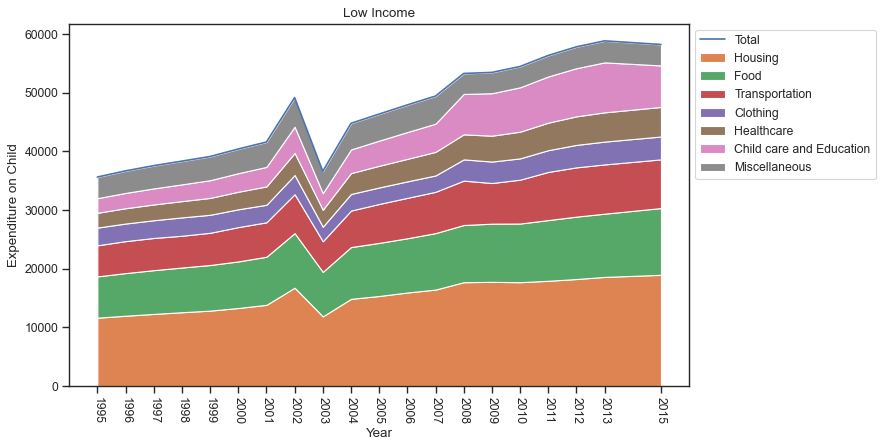

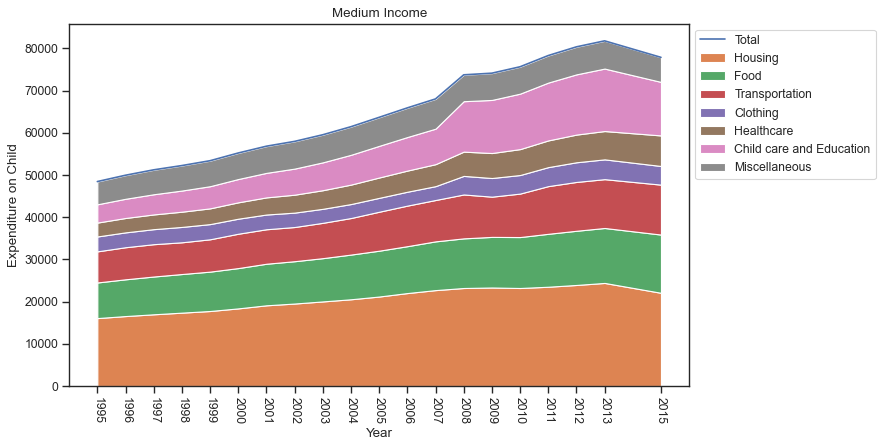

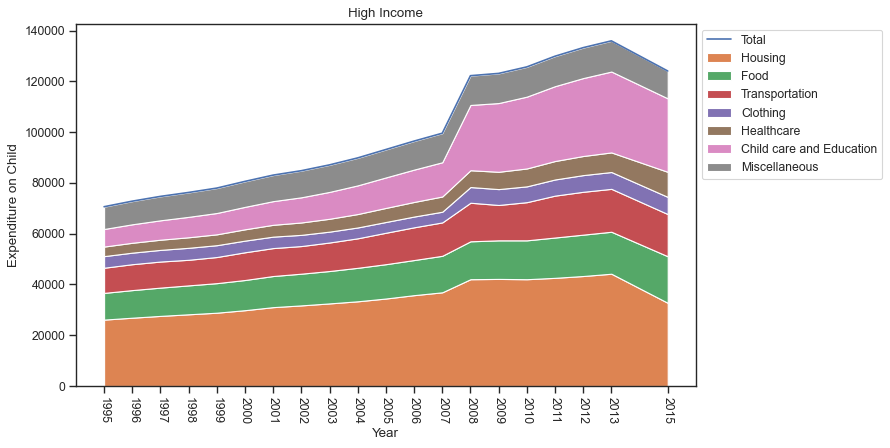

In [32]:
# plotting the child the expenses for different sectors for each age group specified for different Income groups
# age_list = ['0 to 2','3 to 5','6 to 8','9 to 11','12 to 14','15 to 17']
# Annual expenditures on a child by husband-wife families, overall United States,
child_expenses.set_index(['Year', 'Income Category'])
child_expenses.head()
labels = ['Housing', 'Food', 'Transportation', 'Clothing', 'Healthcare', 'Child care and Education', 'Miscellaneous']
income_cat = ['Low Income', 'Medium Income', 'High Income']
for ele in income_cat:
    plt.figure(figsize=(10, 6), dpi=80)
    temp = child_expenses[child_expenses['Income Category'] == ele]
    temp.set_index(['Year'],inplace = True)
    temp = temp.groupby(by=["Year"]).sum()
    plt.plot(temp['Total'], label = "Total")
    plt.stackplot(child_expenses['Year'].unique(), temp['Housing'], temp['Food'], temp['Transportation'], temp['Clothing'],
                 temp['Healthcare'], temp['Child care and Education'], temp['Miscellaneous'],
                 labels=labels)
    plt.xticks(child_expenses['Year'].unique(), rotation = 270)
    plt.title(ele)
    plt.xlabel("Year")
    plt.ylabel("Expenditure on Child")
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()
    

In [33]:
# average annual income of each family from 1995 to 2015
family_income = pd.read_csv("Family_Income.csv")
family_income["Income"] = family_income["Income"].str.replace(",","")
family_income["Income"] = family_income["Income"].str.replace("$","")
family_income["Income"] = family_income["Income"].astype(float)
family_income.head()
# family_income.dtypes

,Year,Income,Income Category
0,1995,21000.0,Low Income
1,1995,44800.0,Medium Income
2,1995,84800.0,High Income
3,1996,21600.0,Low Income
4,1996,46100.0,Medium Income


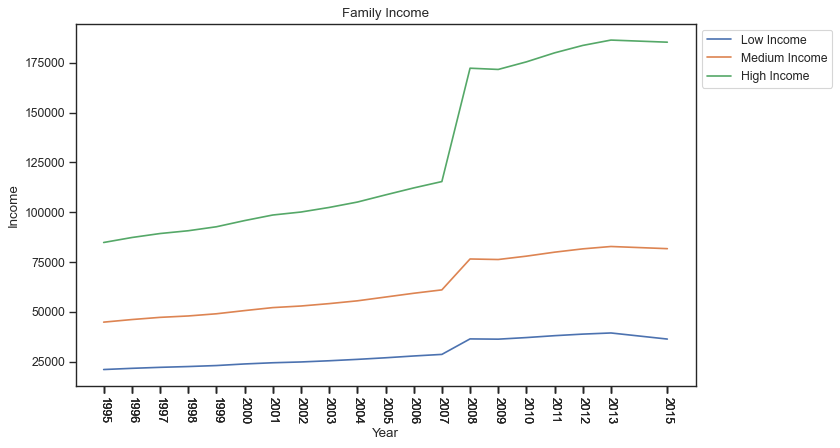

In [34]:
plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot(x = 'Year', y = 'Income', hue ='Income Category', data = family_income).set(title='Family Income')
plt.xticks(family_income["Year"], rotation = 270)
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [35]:
# Grouping the expenditure data for all age groups together by taking the average. So for each year, average child expenditure for each
# income category is calculated and presented in a new dataframe
child_expenses_income_cat = child_expenses.groupby(by=["Year","Income Category"]).mean().round(2)
child_expenses_income_cat.head()

Total  Housing     Food  Transportation  Clothing  \
Year Income Category                                                         
1995 High Income      11768.33  4358.33  1753.33         1651.67    761.67   
     Low Income        5938.33  1941.67  1173.33          883.33    503.33   
     Medium Income     8073.33  2681.67  1406.67         1228.33    588.33   
1996 High Income      12133.33  4483.33  1811.67         1700.00    758.33   
     Low Income        6113.33  1996.67  1211.67          908.33    500.00   

                      Healthcare  Child care and Education  Miscellaneous  
Year Income Category                                                       
1995 High Income          628.33                   1153.33        1461.67  
     Low Income           420.00                    415.00         601.67  
     Medium Income        548.33                    721.67         898.33  
1996 High Income          648.33                   1213.33        1518.33  
     Low Income           435.00                    435.00         626.67

In [36]:
# merging the family_income and child_expenses datasets on the income category values per family
# source  - https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
# using the above source for understanding pd.merge()
income_expense_merge = pd.merge(child_expenses_income_cat,family_income,on=['Year','Income Category'])
income_expense_merge.head()

,Year,Income Category,Total,Housing,Food,Transportation,Clothing,Healthcare,Child care and Education,Miscellaneous,Income
0,1995,High Income,11768.33,4358.33,1753.33,1651.67,761.67,628.33,1153.33,1461.67,84800.0
1,1995,Low Income,5938.33,1941.67,1173.33,883.33,503.33,420.00,415.00,601.67,21000.0
2,1995,Medium Income,8073.33,2681.67,1406.67,1228.33,588.33,548.33,721.67,898.33,44800.0
3,1996,High Income,12133.33,4483.33,1811.67,1700.00,758.33,648.33,1213.33,1518.33,87300.0
4,1996,Low Income,6113.33,1996.67,1211.67,908.33,500.00,435.00,435.00,626.67,21600.0


In [37]:
# categories of all expenses
exp_cat = ['Total', 'Housing', 'Food', 'Transportation','Clothing', 
           'Healthcare', 'Child care and Education', 'Miscellaneous','Income']
exp_cat_per = ['Percent_Total', 'Percent_Housing', 'Percent_Food', 'Percent_Transportation','Percent_Clothing', 
           'Percent_Healthcare', 'Percent_Child care and Education', 'Percent_Miscellaneous']
for ele, ele_per in zip(exp_cat,exp_cat_per):
    income_expense_merge[ele_per]  = (income_expense_merge[ele]/income_expense_merge["Income"])*100
income_expense_merge.head()

,Year,Income Category,Total,Housing,Food,Transportation,Clothing,Healthcare,Child care and Education,Miscellaneous,Income,Percent_Total,Percent_Housing,Percent_Food,Percent_Transportation,Percent_Clothing,Percent_Healthcare,Percent_Child care and Education,Percent_Miscellaneous
0,1995,High Income,11768.33,4358.33,1753.33,1651.67,761.67,628.33,1153.33,1461.67,84800.0,13.877748,5.139540,2.067606,1.947724,0.898196,0.740955,1.360059,1.723667
1,1995,Low Income,5938.33,1941.67,1173.33,883.33,503.33,420.00,415.00,601.67,21000.0,28.277762,9.246048,5.587286,4.206333,2.396810,2.000000,1.976190,2.865095
2,1995,Medium Income,8073.33,2681.67,1406.67,1228.33,588.33,548.33,721.67,898.33,44800.0,18.020826,5.985871,3.139888,2.741808,1.313237,1.223951,1.610871,2.005201
3,1996,High Income,12133.33,4483.33,1811.67,1700.00,758.33,648.33,1213.33,1518.33,87300.0,13.898431,5.135544,2.075223,1.947308,0.868648,0.742646,1.389840,1.739210
4,1996,Low Income,6113.33,1996.67,1211.67,908.33,500.00,435.00,435.00,626.67,21600.0,28.302454,9.243843,5.609583,4.205231,2.314815,2.013889,2.013889,2.901250


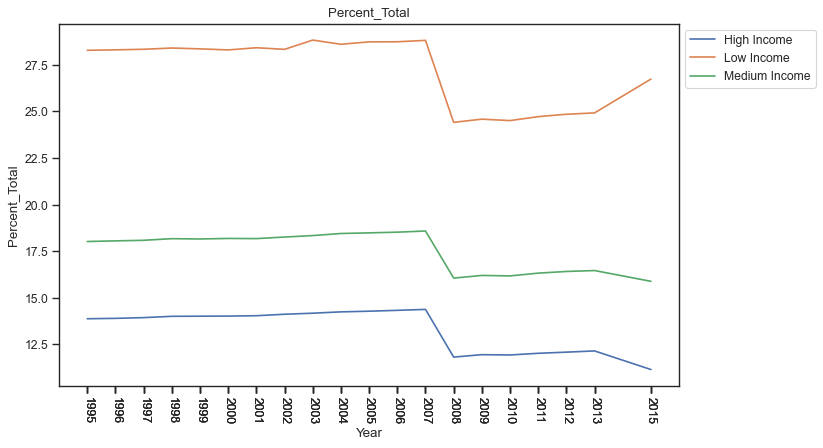

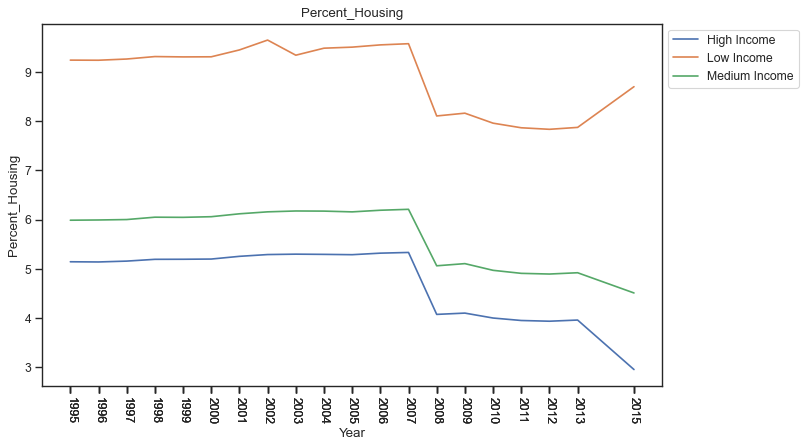

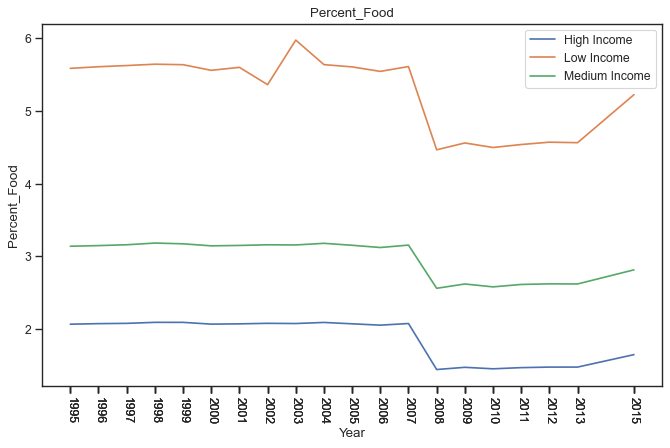

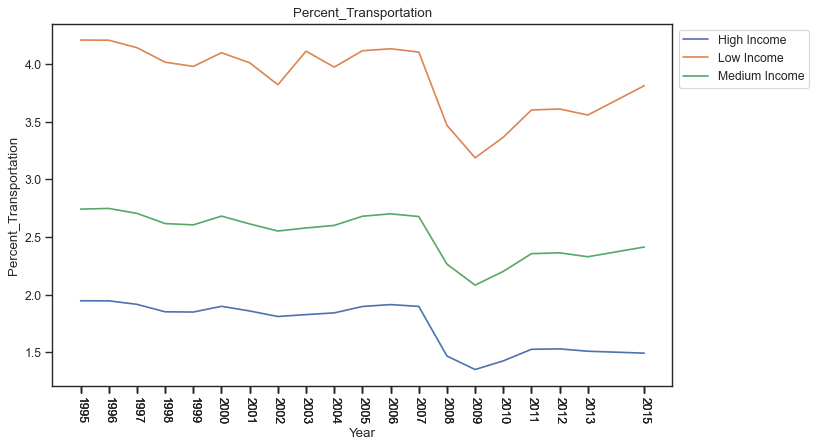

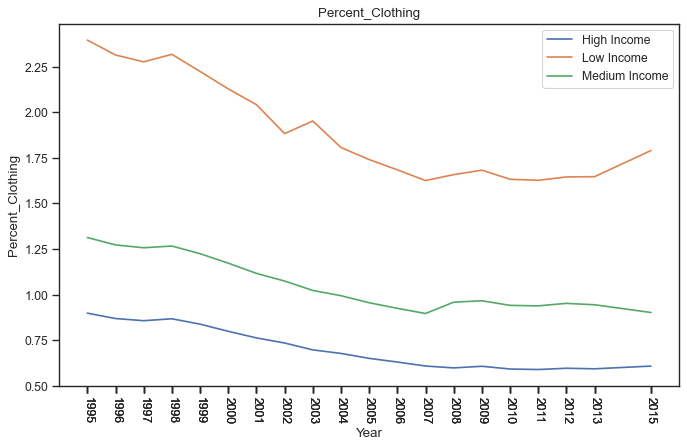

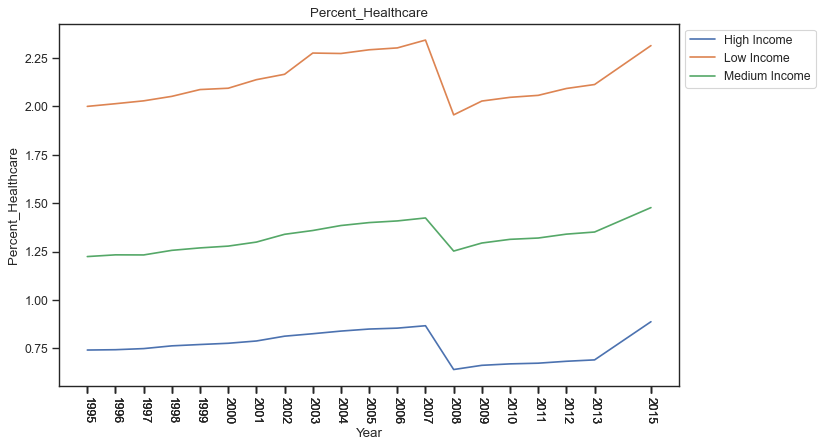

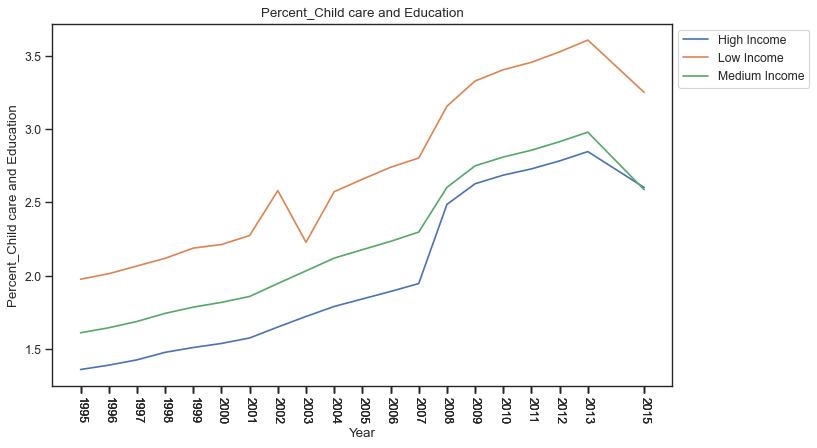

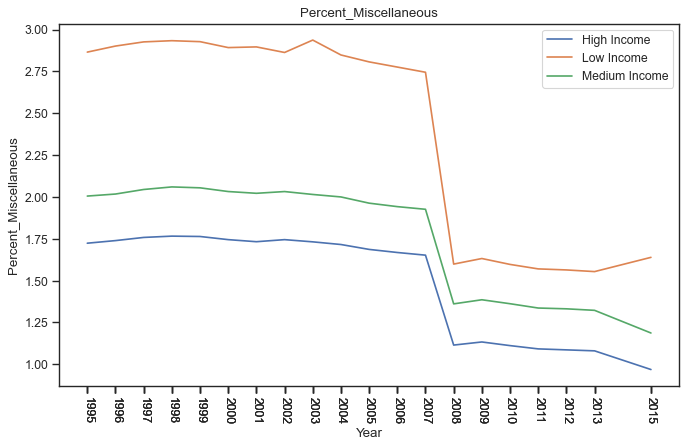

In [38]:
# plotting percentage share of all expenditure compenents for all income categories over the defined period
for ele in exp_cat_per:
    plt.figure(figsize=(10, 6), dpi=80)
    sns.lineplot(x = 'Year', y = ele, hue ='Income Category', data = income_expense_merge).set_title(ele)
    plt.xticks(family_income["Year"], rotation = 270)
    plt.legend(bbox_to_anchor=(1.0, 1.0))

 After analysing different components of the overall expenditure for a child for a family from all three categories of income we can conclude the following: 

1) We can an ovrall drop in the percentage expenditure from 2006 to 2008 except for the category "Child care and Education"

2) The 'Total' expenses on children see an overall dip with an eventual increase for Low Income Families

3) The 'Housing' expenses on children see an overall dip with an eventual increase for Low Income Families

4) The 'Housing' expenses on children see an overall dip with an eventual increase for all three income categories

5) The 'Transportation' expenses on children see an overall dip with an eventual increase for Low and Medium Income Families and constant trend for High Income Families

6) The 'Clothing' expenses on children see an overall dip with an eventual increase for Low Income Families

7) The 'Healthcare' expenses on children see an overall rising trend with an eventual sharp rise for High Income families

8) The 'Childcare and Education' expenses on children see an overall rising trend with an eventual sharp decline for all income categories

9) The 'Miscellaneous' expenses show declning trend in the seleced time period


We can conclude that 'Childcare & Education' and 'Healthcare' are 2 categories where the percentage share of expenditure from the total child expenditure budget has risen in the selected period of time. Thus, supporting the statement in the article we can state that these two factors may lead to couples delaying having children

### Hypothesis 4: Faith, Religion and Religious authority tend to affect a country’s TFR. Countries which are predominantly religious, will have majority of its population following religious practices, which mainly tend to be against abortion, birth prevention, and other family planning methods. We shall compare such countries with the least religious countries and see how drastically TFR and Birth Rate vary.

We shall refer the research conducted by the [Gallop Poll](https://www.gallup-international.bg/en/36009/religion-prevails-in-the-world/) which conducted a survey of around 66,000 members among 68 countries to rank the most and least religious countries in the world. According to this research,

The top 10 most religious countries in the world are:
1. Thailand
2. Nigeria
3. Kosovo
4. India
5. Ghana
6. Ethiopia
7. Ivory Coast (Cote d'Ivoire)
8. Fiji
9. Armenia
10. Philippines

The 10 least religious countries in the world are:

1. China
2. Japan
3. Sweden
4. France
5. Australia
6. Czech Republic
7. Denmark
8. Estonia
9. Germany
10. Hong Kong (Hong Kong SAR, China)


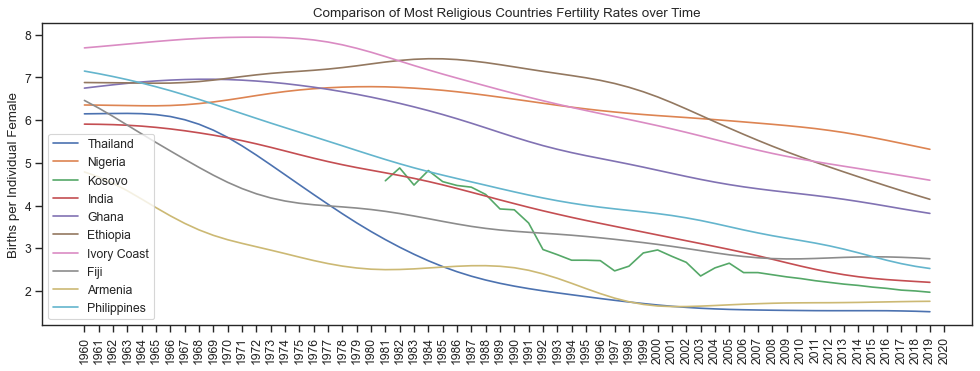

In [41]:
#Plot of Fertility rates for Most Religious Countries 
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['Thailand'], label='Thailand')
plt.plot(fr_flip['Nigeria'], label='Nigeria')
plt.plot(fr_flip['Kosovo'], label='Kosovo')
plt.plot(fr_flip['India'], label='India')
plt.plot(fr_flip['Ghana'], label='Ghana')
plt.plot(fr_flip['Ethiopia'], label='Ethiopia')
plt.plot(fr_flip["Cote d'Ivoire"], label='Ivory Coast')
plt.plot(fr_flip['Fiji'], label='Fiji')
plt.plot(fr_flip['Armenia'], label='Armenia')
plt.plot(fr_flip['Philippines'], label='Philippines')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Most Religious Countries Fertility Rates over Time")
plt.xticks(rotation = 90)
plt.show()

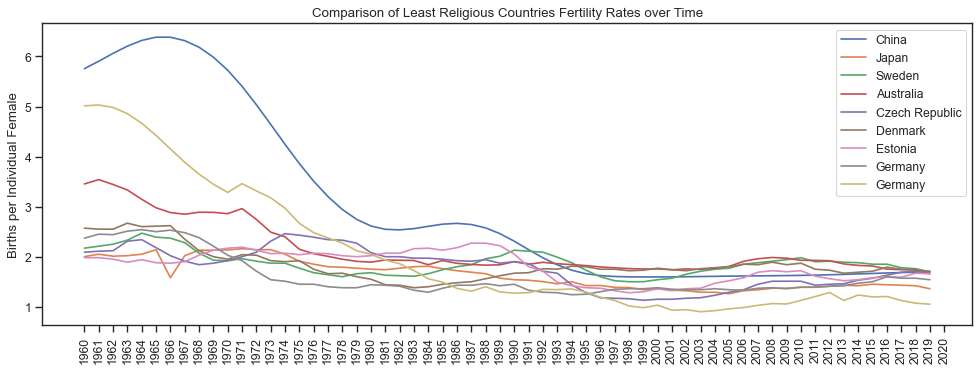

In [43]:
#Plot of Fertility rates for Least Religious Countries 
figure(figsize=(15, 5), dpi=80)
plt.plot(fr_flip['China'], label='China')
plt.plot(fr_flip['Japan'], label='Japan')
plt.plot(fr_flip['Sweden'], label='Sweden')
plt.plot(fr_flip['Australia'], label='Australia')
plt.plot(fr_flip['Czech Republic'], label='Czech Republic')
plt.plot(fr_flip['Denmark'], label='Denmark')
plt.plot(fr_flip['Estonia'], label='Estonia')
plt.plot(fr_flip['Germany'], label='Germany')
plt.plot(fr_flip['Hong Kong SAR, China'], label='Germany')
plt.ylabel('Births per Individual Female')
plt.legend()
plt.title("Comparison of Least Religious Countries Fertility Rates over Time")
plt.xticks(rotation = 90)
plt.show()

### Work left to do:

1. Expand on years of schooling for girls for religious and non religious countries and compare the relation between variation of Fertility rate
2. 